In [10]:
import numpy as np 

class SVM:
    def __init__(self, n_iters = 1000, lr=0.001 , lambda_param = 0.01) -> None:
        self.n_iters = n_iters
        self.learning_rate = lr
        self.lambda_param = lambda_param
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples ,n_features = X.shape[0] ,X.shape[1]
        y_ = np.where( y<=0  , -1 ,1)
        #init weights
        self.w = np.zeros(n_features)
        self.b =0

        for _ in range(self.n_iters):
            for idx , x_i in enumerate(X): # loss function: L = lambda*|W|^2 + 1/n*sumof(hingeloss) , hingeloss = max(0, 1 - y(f(x))) , f(x) = w.x -b
                condition = y_[idx] *(np.dot(x_i , self.w) - self.b) >=1 # y(f(x)) >=1
                if condition:
                    self.w -= self.learning_rate* ( 2 * self.lambda_param * self.w )  # w = w- alpha*dL/dw
                else:
                    self.w -= self.learning_rate * ( 2 * self.lambda_param * self.w  - np.dot(x_i , y_[idx]))
                    self.b -= self.learning_rate * y_[idx]
    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        print("self.weights is ", self.w)
        print("self.bias is ", self.b)
        return np.sign(approx)

self.weights is  [0.60292789 0.1697098 ]
self.bias is  -0.07300000000000005
SVM classification accuracy 1.0


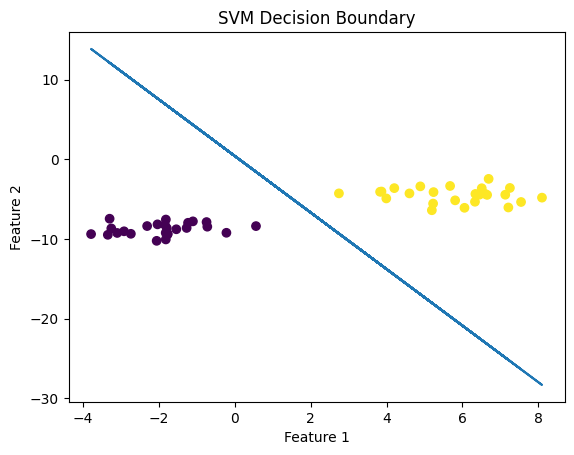

In [50]:
# testing:
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt

X, y = datasets.make_blobs( #It is used to generate synthetic datasets for clustering 
    n_samples=50, n_features=2, centers=2, cluster_std=1.05, random_state=40
)

y = np.where(y == 0, -1, 1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123
)

clf = SVM(n_iters=200)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

print("SVM classification accuracy", accuracy(y_test, predictions))

w = clf.w
b = clf.b

fig = plt.figure()
plt.scatter(X[:,0], X[:,1] ,marker="o", c=y)
x2 = -(w[0] *X[:,0] + b)/w[1]
plt.plot(X[:,0], x2,)
# plt.ylim(-15,0)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('SVM Decision Boundary')

plt.show()